# Python scripting for network analysis — II
Lab session on February 27th

In [1]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

# Homework review

# General aspects
1. for jupyter notebooks, submit .ipynb format
1. "Kernel → Restart and run all" before submission
1. submit all code, not just plots / numerical results
1. correctness vs. stylistic comments


# Ring network
Write a script to create a network of a ring of $N$ nodes, with first and second neighbors connected. An example:
<center><img src='ring_network_example.png' style="width:25%;"></center>

# Checking correctness

* run for different values of $N$

* check the results: draw the network

* check some quantity: number of nodes, number of edges

# An elegant solution:

In [2]:
import networkx
import matplotlib.pyplot as plt

def ring_network(N):
    g = networkx.Graph()
    for i in range(N):
        g.add_edge(i, (i+1)%N)
        g.add_edge(i, (i+2)%N)
    return g

10 20


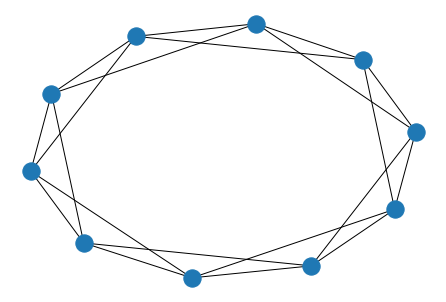

In [3]:
networkx.draw(ring_network(10))
g = ring_network(10)
print(g.number_of_nodes(), g.number_of_edges())

# In- and out-strength

Calculate, plot and describe the in- and out-strength (weighted degree) distribution of the word association dataset

# Calculating the in- and out-strengths

In [4]:
graph = networkx.read_edgelist('./word_association_graph_DSF.txt', 
                               create_using=networkx.DiGraph(), 
                               nodetype=str, data=[('weight', float),])

In [5]:
in_degrees = {}
for node in graph.nodes():
    in_degrees[node] = 0
for source, target, attrs in graph.edges(data=True):
    in_degrees[target] += 1

In [6]:
out_degrees = {}
for node in graph.nodes():
    out_degrees[node] = 0
for source, target, attrs in graph.edges(data=True):
    out_degrees[source] += 1

In [7]:
in_strengths = {}
for node in graph.nodes():
    in_strengths[node] = 0
for source, target, attrs in graph.edges(data=True):
    in_strengths[target] += attrs['weight']

In [8]:
out_strengths = {}
for node in graph.nodes():
    out_strengths[node] = 0
for source, target, attrs in graph.edges(data=True):
    out_strengths[source] += attrs['weight']

In [9]:
len(out_strengths.keys()), graph.number_of_nodes()

(10616, 10616)

# Plotting the histograms

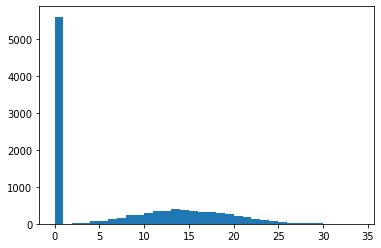

In [10]:
_ = plt.hist(out_degrees.values(), bins=max(out_degrees.values()))

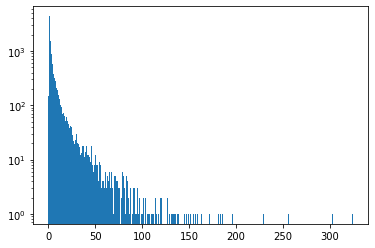

In [11]:
_ = plt.hist(in_degrees.values(), bins=max(in_degrees.values()), log=True)

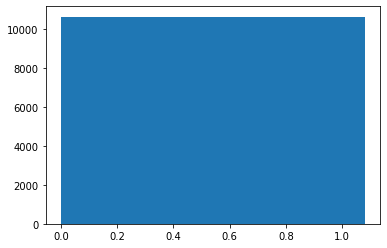

In [12]:
_ = plt.hist(out_strengths.values(), bins=int(max(out_strengths.values())))

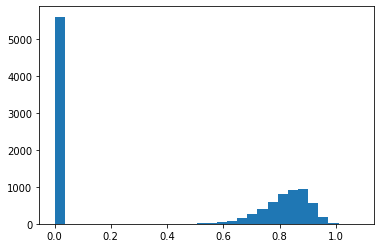

In [13]:
_ = plt.hist(out_strengths.values(), bins=30)

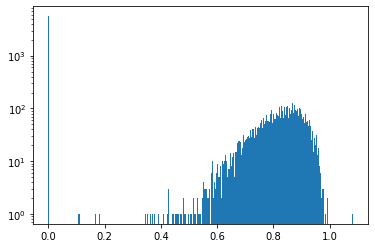

In [14]:
_ = plt.hist(out_strengths.values(), bins=300, log=True)

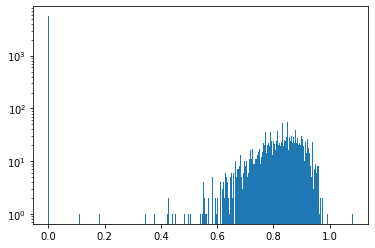

In [15]:
_ = plt.hist(out_strengths.values(), bins=900, log=True)

In [16]:
len([v for v in in_degrees.values() if v == 0])

149

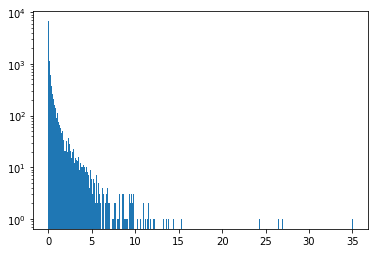

In [17]:
_ = plt.hist(in_strengths.values(), bins=300, log=True)

# Best way to plot

* number of bins
* scaling of axes

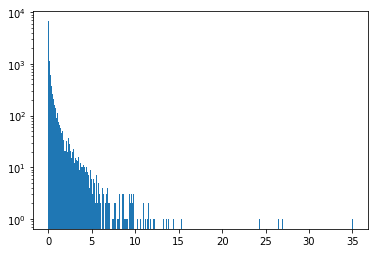

In [18]:
_ = plt.hist(in_strengths.values(), bins=300, log=True)

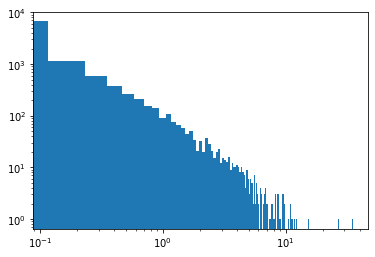

In [19]:
plt.xscale('log')
_ = plt.hist(in_strengths.values(), bins=300, log=True)

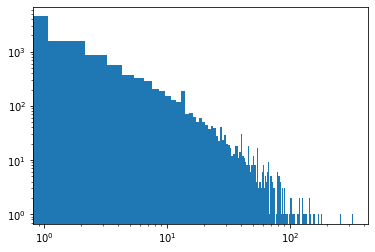

In [20]:
plt.xscale('log')
_ = plt.hist(in_degrees.values(), bins=300, log=True)

# Describing the histograms

* is spike at zero due to zero degree nodes? (check data, histogram might be misleading)
* compare to degree histograms -- which parts are the same, which are different?
* are datapoints at the right-hand edge outliers?

# Out-degrees and out-strengths: which function?

* already called it "self-similar" last week: zooming to leave out initial spike doesn't change it
* powerlaws discussed by Prof. Palla during the last lecture

# powerlaw?

What else can it be?

How do we check?

A. Clauset, C.R. Shalizi, and M.E.J. Newman, "Power-law distributions in empirical data" SIAM Review 51(4), 661-703 (2009) https://arxiv.org/abs/0706.1062

In python: "powerlaw" library — "! pip install powerlaw"

In [21]:
import sys
!{sys.executable} -m pip install powerlaw
import powerlaw
fit = powerlaw.Fit(list(in_degrees.values()))

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
C:\Users\trinh\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [22]:
fit.power_law.alpha

2.9852246312570587

In [23]:
R, p = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)

In [24]:
R,p

(0.773738003221026, 0.43908574152893753)

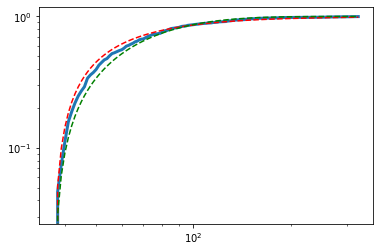

In [25]:
fig = fit.plot_cdf(linewidth=3)
fit.power_law.plot_cdf(ax=fig, color='r', linestyle='--')
fit.exponential.plot_cdf(ax=fig, color='g', linestyle='--')

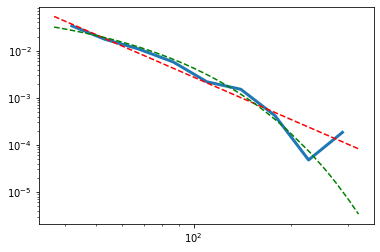

In [26]:
fig = fit.plot_pdf(linewidth=3)
fit.power_law.plot_pdf(ax=fig, color='r', linestyle='--')
fit.exponential.plot_pdf(ax=fig, color='g', linestyle='--')

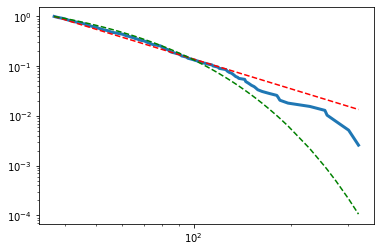

In [27]:
fig = fit.plot_ccdf(linewidth=3)
fit.power_law.plot_ccdf(ax=fig, color='r', linestyle='--')
fit.exponential.plot_ccdf(ax=fig, color='g', linestyle='--')

In [28]:
R, p = fit.distribution_compare('power_law', 'truncated_power_law', normalized_ratio=True)

Assuming nested distributions


In [29]:
R,p

(-2.274687103696355, 0.0004899977192411864)

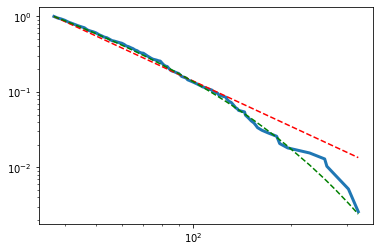

In [30]:
fig = fit.plot_ccdf(linewidth=3)
fit.power_law.plot_ccdf(ax=fig, color='r', linestyle='--')
fit.truncated_power_law.plot_ccdf(ax=fig, color='g', linestyle='--')

# Various ways of plotting:

1. PDF: probability density function
1. CDF: cumulative density function
1. CCDF: complementary cumulative density function


# Note

Newer paper of same main author: A. D. Broido and A. Clauset: "Scale-free networks are rare" Nature Communications 10, 1017 (2019) https://arxiv.org/abs/1801.03400

Their claim: scale-free property is much more rare

Barabási Albert-László's counter-argument (https://www.barabasilab.com/post/love-is-all-you-need): using their method, not even scale-free model is considered scale-free

# Does it matter?

powerlaw vs. fat-tailed

# Explaining the histograms

* what the histograms look like (describing)

* why they look like that (explaining)

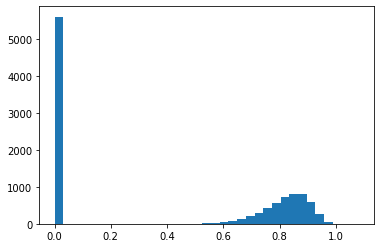

In [31]:
_ = plt.hist(out_strengths.values(), bins=35)

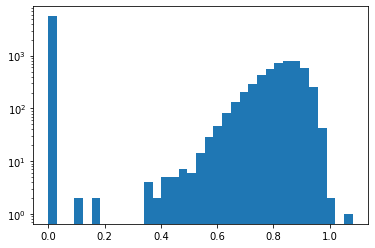

In [32]:
_ = plt.hist(out_strengths.values(), bins=35, log=True)

# Ring & shortcuts network

We construct the following network:
1. ring of $N$ nodes with first and second neighbor connections
1. add $N/2$ shortcuts (additional edges) at random

Question: what is the average clustering coefficient of this network as $N \to \infty$?

# Homework assignment

Calculate a computational estimate: write a script to generate such networks and measure the average clustering coefficient; give an estimate for $N \to \infty$

Useful tools
* random module ("import random") -- especially random.choice and random.shuffle
* networkx.average_clustering